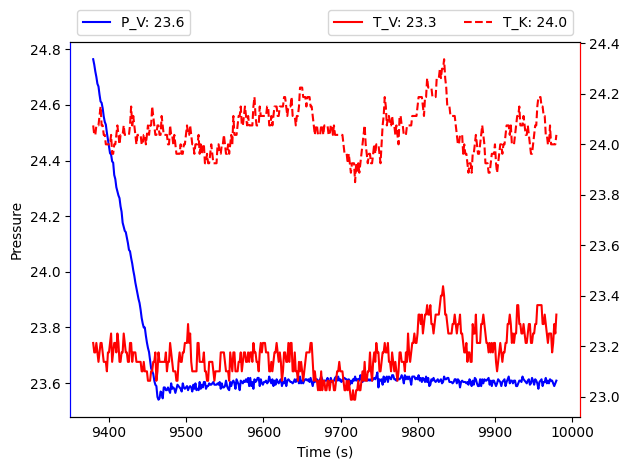

Live plot stopped.


In [32]:
import sys , os
sys.path.append(os.path.abspath(os.path.join("..")))
from utils.sensors import ADS1115

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from IPython.display import clear_output, display, HTML
import time

display(HTML("""
<style>
.output_png {
    max-width: 100% !important;
    height: auto !important;
}
</style>
"""))

# Plot settings
window = 600  # seconds of history to show
sample_interval = 1  # seconds between readings

ads=ADS1115()

plt.ion()
fig, ax = plt.subplots()
axa=ax
axb=axa.twinx()
line1, = axa.plot([], [], color=[0,0,1], label='P_V')
line2, = axb.plot([], [], color=[1,0,0], label='T_V')
line3, = axb.plot([], [], color=[1,0,0], ls='--', label='T_K')
axa.set_xlabel("Time (s)")
axa.set_ylabel("Pressure")
axa.spines['left'].set_color([0,0,1])
axa.spines['right'].set_color([1,0,0])
axb.spines['left'].set_color([0,0,1])
axb.spines['right'].set_color([1,0,0])

start_time = time.time()

ttt=[]
t_k=[]
t_v=[]
p_v=[]

try:
    while True:
        now = time.time() - start_time
        
        ttt.append(now)
        t_k.append(ads.temperature(0))
        t_v.append(ads.temperature(1))
        p_v.append(ads.pressure(2))

        # Trim to last 30 seconds
        while ttt and (now - ttt[0]) > window:
            ttt.pop(0)
            t_k.pop(0)
            t_v.pop(0)
            p_v.pop(0)

        # Update plot
        line1.set_data(ttt, p_v)
        line1.set_label(f'P_V: {p_v[-1]:0.1f}')
        line2.set_data(ttt, t_v)
        line2.set_label(f'T_V: {t_v[-1]:0.1f}')
        line3.set_data(ttt, t_k)
        line3.set_label(f'T_K: {t_k[-1]:0.1f}')
        axa.legend(loc='lower left',bbox_to_anchor=[0,1],ncol=1)
        axb.legend(loc='lower right',bbox_to_anchor=[1,1],ncol=2)
        axa.relim()
        axb.relim()
        axa.autoscale_view()
        axb.autoscale_view()
        fig.tight_layout()
        clear_output(wait=True)
        display(fig)
        plt.pause(0.01)

        time.sleep(sample_interval)

except KeyboardInterrupt:
    plt.ioff()
    print("Live plot stopped.")